# CS 190I Homework 3: Multi-class classification in pytorch
In this machine problem (MP), you will learn the basic concepts in pytorch. You will then use `torch.nn` to implement a neural network and use `torch.autograd` to calculate the gradient and train your model.

**Acknolwedgement:**  Part of this notebook was originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for CS231N at Stanford and EECSE498 at UMich.

# PyTorch Introduction

[PyTorch](https://pytorch.org/) is an open source machine learning framework. At its core, PyTorch provides a few key features:

- A multidimensional **Tensor** object, similar to [numpy](https://numpy.org/) but with GPU accelleration.
- An optimized **autograd** engine for automatically computing derivatives
- A clean, modular API for building and deploying **deep learning models**

We will use PyTorch for all future assignments throughout the quarter.

You can find more information about PyTorch by following one of the [oficial tutorials](https://pytorch.org/tutorials/) or by [reading the documentation](https://pytorch.org/docs/stable/).

To use PyTorch, we first need to import the `torch` package.

We also check the version; the assignments in this course will use PyTorch verion 2.1.0.

In [ ]:
import torch
print(torch.__version__)

2.1.0+cu118


## Tensor Basics

### Creating and Accessing tensors

A `torch` **tensor** is a multidimensional grid of values, all of the same type. The **shape** of a tensor is a tuple of integers giving the size of the array along each dimension.

We can initialize `torch` tensor from nested Python lists. We can access or mutate elements of a PyTorch tensor using square brackets.

Accessing an element from a PyTorch tensor returns a PyTorch scalar; we can convert this to a Python scalar using the `.item()` method:

In [ ]:
# Create a rank 1 tensor from a Python list
a = torch.tensor([1, 2, 3])
print('Here is a:')
print(a)
print('type(a): ', type(a))
print('a.shape: ', a.shape)

# Access elements using square brackets
print()
print('a[0]: ', a[0])
print('type(a[0]): ', type(a[0]))
print('type(a[0].item()): ', type(a[0].item()))

# Mutate elements using square brackets
a[1] = 10
print()
print('a after mutating:')
print(a)

Here is a:
tensor([1, 2, 3])
type(a):  <class 'torch.Tensor'>
a.shape:  torch.Size([3])

a[0]:  tensor(1)
type(a[0]):  <class 'torch.Tensor'>
type(a[0].item()):  <class 'int'>

a after mutating:
tensor([ 1, 10,  3])


The example above shows a one-dimensional tensor; we can similarly create tensors with two or more dimensions:

In [ ]:
# Create a two-dimensional tensor
b = torch.tensor([[1, 2, 3], [4, 5, 5]])
print('Here is b:')
print(b)
print('b.shape: ', b.shape)

# Access elements from a multidimensional tensor
print()
print('b[0, 1]:', b[0, 1])
print('b[1, 2]:', b[1, 2])

# Mutate elements of a multidimensional tensor
b[1, 1] = 100
print()
print('b after mutating:')
print(b)

Here is b:
tensor([[1, 2, 3],
        [4, 5, 5]])
b.shape:  torch.Size([2, 3])

b[0, 1]: tensor(2)
b[1, 2]: tensor(5)

b after mutating:
tensor([[  1,   2,   3],
        [  4, 100,   5]])


### Tensor constructors

PyTorch provides many convenience methods for constructing tensors; this avoids the need to use Python lists. For example:

- [`torch.zeros`](https://pytorch.org/docs/1.1.0/torch.html#torch.zeros): Creates a tensor of all zeros
- [`torch.ones`](https://pytorch.org/docs/1.1.0/torch.html#torch.ones): Creates a tensor of all ones
- [`torch.rand`](https://pytorch.org/docs/1.1.0/torch.html#torch.rand): Creates a tensor with uniform random numbers

You can find a full list of tensor creation operations [in the documentation](https://pytorch.org/docs/stable/torch.html#creation-ops).

In [ ]:
# Create a tensor of all zeros
a = torch.zeros(2, 3)
print('tensor of zeros:')
print(a)

# Create a tensor of all ones
b = torch.ones(1, 2)
print('\ntensor of ones:')
print(b)

# Create a 3x3 identity matrix
c = torch.eye(3)
print('\nidentity matrix:')
print(c)

# Tensor of random values
d = torch.rand(4, 5)
print('\nrandom tensor:')
print(d)

tensor of zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor of ones:
tensor([[1., 1.]])

identity matrix:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

random tensor:
tensor([[0.4177, 0.2179, 0.9758, 0.4692, 0.3760],
        [0.6803, 0.5362, 0.8679, 0.7890, 0.2099],
        [0.6545, 0.4731, 0.1014, 0.9514, 0.3481],
        [0.2805, 0.3787, 0.6139, 0.7175, 0.2107]])


### Datatypes

PyTorch provides a [large set of numeric datatypes](https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype) that you can use to construct tensors. PyTorch tries to guess a datatype when you create a tensor; functions that construct tensors typically have a `dtype` argument that you can use to explicitly specify a datatype.

Each tensor has a `dtype` attribute that you can use to check its data type:

In [ ]:
# Let torch choose the datatype
x0 = torch.tensor([1, 2])   # List of integers
x1 = torch.tensor([1., 2.]) # List of floats
x2 = torch.tensor([1., 2])  # Mixed list
print('dtype when torch chooses for us:')
print('List of integers:', x0.dtype)
print('List of floats:', x1.dtype)
print('Mixed list:', x2.dtype)

# Force a particular datatype
y0 = torch.tensor([1, 2], dtype=torch.float32)  # 32-bit float
y1 = torch.tensor([1, 2], dtype=torch.int32)    # 32-bit (signed) integer
y2 = torch.tensor([1, 2], dtype=torch.int64)    # 64-bit (signed) integer
print('\ndtype when we force a datatype:')
print('32-bit float: ', y0.dtype)
print('32-bit integer: ', y1.dtype)
print('64-bit integer: ', y2.dtype)

dtype when torch chooses for us:
List of integers: torch.int64
List of floats: torch.float32
Mixed list: torch.float32

dtype when we force a datatype:
32-bit float:  torch.float32
32-bit integer:  torch.int32
64-bit integer:  torch.int64


We can **cast** a tensor to another datatype using the [`.to()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.to) method; there are also convenience methods like [`.float()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.float) and [`.long()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.long) that cast to particular datatypes:


In [ ]:
x0 = torch.eye(3, dtype=torch.int64)
x1 = x0.float()  # Cast to 32-bit float
x2 = x0.double() # Cast to 64-bit float
x3 = x0.to(torch.float32) # Alternate way to cast to 32-bit float
x4 = x0.to(torch.float64) # Alternate way to cast to 64-bit float
print('x0:', x0.dtype)
print('x1:', x1.dtype)
print('x2:', x2.dtype)
print('x3:', x3.dtype)
print('x4:', x4.dtype)

x0: torch.int64
x1: torch.float32
x2: torch.float64
x3: torch.float32
x4: torch.float64


Even though PyTorch provides a large number of numeric datatypes, the most commonly used datatypes are:

- `torch.float32`: Standard floating-point type; used to store learnable parameters, network activations, etc. Nearly all arithmetic is done using this type.
- `torch.int64`: Typically used to store indices
- `torch.bool`: Stores boolean values: 0 is false and 1 is true
- `torch.float16`: Used for mixed-precision arithmetic, usually on NVIDIA GPUs with [tensor cores](https://www.nvidia.com/en-us/data-center/tensorcore/). You won't need to worry about this datatype in this course.

## Tensor indexing

We have already seen how to get and set individual elements of PyTorch tensors. PyTorch also provides many other ways of indexing into tensors.

### Slice indexing

Similar to Python lists and numpy arrays, PyTorch tensors can be **sliced** using the syntax `start:stop` or `start:stop:step`. The `stop` index is always non-inclusive: it is the first element not to be included in the slice.

Start and stop indices can be negative, in which case they count backward from the end of the tensor.

In [ ]:
a = torch.tensor([0, 11, 22, 33, 44, 55, 66])
print(0, a)        # (0) Original tensor
print(1, a[2:5])   # (1) Elements between index 2 and 5
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5
print(6, a[:-1])   # (6) All but the last element
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

0 tensor([ 0, 11, 22, 33, 44, 55, 66])
1 tensor([22, 33, 44])
2 tensor([22, 33, 44, 55, 66])
3 tensor([ 0, 11, 22, 33, 44])
4 tensor([ 0, 11, 22, 33, 44, 55, 66])
5 tensor([11, 33])
6 tensor([ 0, 11, 22, 33, 44, 55])
7 tensor([33, 55])


For multidimensional tensors, you can provide a slice or integer for each dimension of the tensor in order to extract different types of subtensors:

In [ ]:
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor:')
print(a)
print('shape: ', a.shape)

# Get row 1, and all columns.
print('\nSingle row:')
print(a[1, :])
print(a[1])  # Gives the same result; we can omit : for trailing dimensions
print('shape: ', a[1].shape)

print('\nSingle column:')
print(a[:, 1])
print('shape: ', a[:, 1].shape)

# Get the first two rows and the last three columns
print('\nFirst two rows, last two columns:')
print(a[:2, -3:])
print('shape: ', a[:2, -3:].shape)

# Get every other row, and columns at index 1 and 2
print('\nEvery other row, middle columns:')
print(a[::2, 1:3])
print('shape: ', a[::2, 1:3].shape)

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
shape:  torch.Size([3, 4])

Single row:
tensor([5, 6, 7, 8])
tensor([5, 6, 7, 8])
shape:  torch.Size([4])

Single column:
tensor([ 2,  6, 10])
shape:  torch.Size([3])

First two rows, last two columns:
tensor([[2, 3, 4],
        [6, 7, 8]])
shape:  torch.Size([2, 3])

Every other row, middle columns:
tensor([[ 2,  3],
        [10, 11]])
shape:  torch.Size([2, 2])


There are two common ways to access a single row or column of a tensor: using an integer will reduce the rank by one, and using a length-one slice will keep the same rank.

In [ ]:
# Create the following rank 2 tensor with shape (3, 4)
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor')
print(a)

row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print('\nTwo ways of accessing a single row:')
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

Original tensor
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Two ways of accessing a single row:
tensor([5, 6, 7, 8]) torch.Size([4])
tensor([[5, 6, 7, 8]]) torch.Size([1, 4])


So far we have used slicing to **access** subtensors; we can also use slicing to **modify** subtensors by writing assignment expressions where the left-hand side is a slice expression, and the right-hand side is a constant or a tensor of the correct shape:

In [ ]:
a = torch.zeros(2, 4, dtype=torch.int64)
a[:, :2] = 1
a[:, 2:] = torch.tensor([[2, 3], [4, 5]])
print(a)

tensor([[1, 1, 2, 3],
        [1, 1, 4, 5]])


### Integer tensor indexing

When you index into torch tensor using slicing, the resulting tensor view will always be a subarray of the original tensor. This is powerful, but can be restrictive.

We can also use **index arrays** to index tensors; this lets us construct new tensors with a lot more flexibility than using slices.

As an example, we can use index arrays to reorder the rows or columns of a tensor:

In [ ]:
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('Original tensor:')
print(a)

# Create a new tensor of shape (5, 4) by reordering rows from a:
# - First two rows same as the first row of a
# - Third row is the same as the last row of a
# - Fourth and fifth rows are the same as the second row from a
idx = [0, 0, 2, 1, 1]  # index arrays can be Python lists of integers
print('\nReordered rows:')
print(a[idx])

# Create a new tensor of shape (3, 4) by reversing the columns from a
idx = torch.tensor([3, 2, 1, 0])  # Index arrays can be int64 torch tensors
print('\nReordered columns:')
print(a[:, idx])

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Reordered rows:
tensor([[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 9, 10, 11, 12],
        [ 5,  6,  7,  8],
        [ 5,  6,  7,  8]])

Reordered columns:
tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])


More generally, given index arrays `idx0` and `idx1` with `N` elements each, `a[idx0, idx1]` is equivalent to:

```
torch.tensor([
  a[idx0[0], idx1[0]],
  a[idx0[1], idx1[1]],
  ...,
  a[idx0[N - 1], idx1[N - 1]]
])
```

(A similar pattern extends to tensors with more than two dimensions)

We can for example use this to get or set the diagonal of a tensor:

In [ ]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Original tensor:')
print(a)

idx = [0, 1, 2]
print('\nGet the diagonal:')
print(a[idx, idx])

# Modify the diagonal
a[idx, idx] = torch.tensor([11, 22, 33])
print('\nAfter setting the diagonal:')
print(a)

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Get the diagonal:
tensor([1, 5, 9])

After setting the diagonal:
tensor([[11,  2,  3],
        [ 4, 22,  6],
        [ 7,  8, 33]])


### Boolean tensor indexing

Boolean tensor indexing lets you pick out arbitrary elements of a tensor according to a boolean mask. Frequently this type of indexing is used to select or modify the elements of a tensor that satisfy some condition.

In PyTorch, we use tensors of dtype `torch.bool` to hold boolean masks.

In [ ]:
a = torch.tensor([[1,2], [3, 4], [5, 6]])
print('Original tensor:')
print(a)

# Find the elements of a that are bigger than 3. The mask has the same shape as
# a, where each element of mask tells whether the corresponding element of a
# is greater than three.
mask = (a > 3)
print('\nMask tensor:')
print(mask)

# We can use the mask to construct a rank-1 tensor containing the elements of a
# that are selected by the mask
print('\nSelecting elements with the mask:')
print(a[mask])

# We can also use boolean masks to modify tensors; for example this sets all
# elements <= 3 to zero:
a[a <= 3] = 0
print('\nAfter modifying with a mask:')
print(a)

Original tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Mask tensor:
tensor([[False, False],
        [False,  True],
        [ True,  True]])

Selecting elements with the mask:
tensor([4, 5, 6])

After modifying with a mask:
tensor([[0, 0],
        [0, 4],
        [5, 6]])


## Reshaping operations

### View

PyTorch provides many ways to manipulate the shapes of tensors. The simplest example is [`.view()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.view): This returns a new tensor with the same number of elements as its input, but with a different shape.

We can use `.view()` to flatten matrices into vectors, and to convert rank-1 vectors into rank-2 row or column matrices:

In [ ]:
x0 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Flatten x0 into a rank 1 vector of shape (8,)
x1 = x0.view(8)
print('\nFlattened tensor:')
print(x1)
print('shape:', x1.shape)

# Convert x1 to a rank 2 "row vector" of shape (1, 8)
x2 = x1.view(1, 8)
print('\nRow vector:')
print(x2)
print('shape:', x2.shape)

# Convert x1 to a rank 2 "column vector" of shape (8, 1)
x3 = x1.view(8, 1)
print('\nColumn vector:')
print(x3)
print('shape:', x3.shape)

# Convert x1 to a rank 3 tensor of shape (2, 2, 2):
x4 = x1.view(2, 2, 2)
print('\nRank 3 tensor:')
print(x4)
print('shape:', x4.shape)

Original tensor:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
shape: torch.Size([2, 4])

Flattened tensor:
tensor([1, 2, 3, 4, 5, 6, 7, 8])
shape: torch.Size([8])

Row vector:
tensor([[1, 2, 3, 4, 5, 6, 7, 8]])
shape: torch.Size([1, 8])

Column vector:
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])
shape: torch.Size([8, 1])

Rank 3 tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
shape: torch.Size([2, 2, 2])


As a convenience, calls to `.view()` may include a single -1 argument; this puts enough elements on that dimension so that the output has the same shape as the input. This makes it easy to write some reshape operations in a way that is agnostic to the shape of the tensor:

In [ ]:
# We can reuse these functions for tensors of different shapes
def flatten(x):
    return x.view(-1)

def make_row_vec(x):
    return x.view(1, -1)

x0 = torch.tensor([[1, 2, 3], [4, 5, 6]])
x0_flat = flatten(x0)
x0_row = make_row_vec(x0)
print('x0:')
print(x0)
print('x0_flat:')
print(x0_flat)
print('x0_row:')
print(x0_row)

x0:
tensor([[1, 2, 3],
        [4, 5, 6]])
x0_flat:
tensor([1, 2, 3, 4, 5, 6])
x0_row:
tensor([[1, 2, 3, 4, 5, 6]])


As its name implies, a tensor returned by `.view()` shares the same data as the input, so changes to one will affect the other and vice-versa:

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x_flat = x.view(-1)
print('x before modifying:')
print(x)
print('x_flat before modifying:')
print(x_flat)

x[0, 0] = 10   # x[0, 0] and x_flat[0] point to the same data
x_flat[1] = 20 # x_flat[1] and x[0, 1] point to the same data

print('\nx after modifying:')
print(x)
print('x_flat after modifying:')
print(x_flat)

x before modifying:
tensor([[1, 2, 3],
        [4, 5, 6]])
x_flat before modifying:
tensor([1, 2, 3, 4, 5, 6])

x after modifying:
tensor([[10, 20,  3],
        [ 4,  5,  6]])
x_flat after modifying:
tensor([10, 20,  3,  4,  5,  6])


## Tensor operations
So far we have seen how to construct, access, and reshape tensors. But one of the most important reasons to use tensors is for performing computation! PyTorch provides many different operations to perform computations on tensors.

### Elementwise operations

Basic mathematical functions operate elementwise on tensors, and are available as operator overloads, as functions in the `torch` module, and as instance methods on torch objects; all produce the same results:

In [ ]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6, 7, 8]], dtype=torch.float32)

# Elementwise sum; all give the same result
print('Elementwise sum:')
print(x + y)
print(torch.add(x, y))
print(x.add(y))

# Elementwise difference
print('\nElementwise difference:')
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

# Elementwise product
print('\nElementwise product:')
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

# Elementwise division
print('\nElementwise division')
print(x / y)
print(torch.div(x, y))
print(x.div(y))

# Elementwise power
print('\nElementwise power')
print(x ** y)
print(torch.pow(x, y))
print(x.pow(y))

Elementwise sum:
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])

Elementwise difference:
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])

Elementwise product:
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])

Elementwise division
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])

Elementwise power
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])


Torch also provides many standard mathematical functions; these are available both as functions in the `torch` module and as instance methods on tensors:

You can find a full list of all available mathematical functions [in the documentation](https://pytorch.org/docs/stable/torch.html#pointwise-ops); many functions in the `torch` module have corresponding instance methods [on tensor objects](https://pytorch.org/docs/stable/tensors.html).

In [ ]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)

print('Square root:')
print(torch.sqrt(x))
print(x.sqrt())

print('\nTrig functions:')
print(torch.sin(x))
print(x.sin())
print(torch.cos(x))
print(x.cos())

Square root:
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])

Trig functions:
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])


### Reduction operations

So far we've seen basic arithmetic operations on tensors that operate elementwise. We may sometimes want to perform operations that aggregate over part or all of a tensor, such as a summation; these are called **reduction** operations.

Like the elementwise operations above, most reduction operations are available both as functions in the `torch` module and as instance methods on `tensor` objects.

The simplest reduction operation is summation. We can use the [`.sum()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.sum) function (or eqivalently [`torch.sum`](https://pytorch.org/docs/stable/generated/torch.sum.html)) to reduce either an entire tensor, or to reduce along only one dimension of the tensor using the `dim` argument:

In [ ]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)
print('Original tensor:')
print(x)

print('\nSum over entire tensor:')
print(torch.sum(x))
print(x.sum())

# We can sum over each row:
print('\nSum of each row:')
print(torch.sum(x, dim=0))
print(x.sum(dim=0))

# Sum over each column:
print('\nSum of each column:')
print(torch.sum(x, dim=1))
print(x.sum(dim=1))

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Sum over entire tensor:
tensor(21.)
tensor(21.)

Sum of each row:
tensor([5., 7., 9.])
tensor([5., 7., 9.])

Sum of each column:
tensor([ 6., 15.])
tensor([ 6., 15.])


Other useful reduction operations include [`mean`](https://pytorch.org/docs/stable/torch.html#torch.mean), [`min`](https://pytorch.org/docs/stable/torch.html#torch.min), and [`max`](https://pytorch.org/docs/stable/torch.html#torch.max). You can find a full list of all available reduction operations [in the documentation](https://pytorch.org/docs/stable/torch.html#reduction-ops).

Reduction operations *reduce* the rank of tensors: the dimension over which you perform the reduction will be removed from the shape of the output. If you pass `keepdim=True` to a reduction operation, the specified dimension will not be removed; the output tensor will instead have a shape of 1 in that dimension.

When you are working with multidimensional tensors, thinking about rows and columns can become confusing; instead it's more useful to think about the shape that will result from each operation. For example:

In [ ]:
# Create a tensor of shape (128, 10, 3, 64, 64)
x = torch.randn(128, 10, 3, 64, 64)
print(x.shape)

# Take the mean over dimension 1; shape is now (128, 3, 64, 64)
x = x.mean(dim=1)
print(x.shape)

# Take the sum over dimension 2; shape is now (128, 3, 64)
x = x.sum(dim=2)
print(x.shape)

# Take the mean over dimension 1, but keep the dimension from being eliminated
# by passing keepdim=True; shape is now (128, 1, 64)
x = x.mean(dim=1, keepdim=True)
print(x.shape)

torch.Size([128, 10, 3, 64, 64])
torch.Size([128, 3, 64, 64])
torch.Size([128, 3, 64])
torch.Size([128, 1, 64])


### Matrix operations

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. PyTorch provides a number of linear algebra functions that compute different types of vector and matrix products. The most commonly used are:

- [`torch.dot`](https://pytorch.org/docs/stable/generated/torch.dot.html#torch.dot): Computes inner product of vectors
- [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html#torch.mm): Computes matrix-matrix products
- [`torch.mv`](https://pytorch.org/docs/stable/generated/torch.mv.html#torch.mv): Computes matrix-vector products
- [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html#torch.bmm) / [`torch.baddmm`](https://pytorch.org/docs/stable/generated/torch.baddbmm.html#torch.baddbmm): Batched versions of `torch.mm` and `torch.addmm`, respectively
- [`torch.matmul`](https://pytorch.org/docs/stable/generated/torch.matmul.html#torch.matmul): General matrix product that performs different operations depending on the rank of the inputs. Confusingly, this is similar to `np.dot` in numpy.

You can find a full list of the available linear algebra operators [in the documentation](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations).

Here is an example of using `torch.dot` to compute inner products. Like the other mathematical operators we've seen, most linear algebra operators are available both as functions in the `torch` module and as instance methods of tensors:

In [ ]:
v = torch.tensor([9,10], dtype=torch.float32)
w = torch.tensor([11, 12], dtype=torch.float32)

# Inner product of vectors
print('Dot products:')
print(torch.dot(v, w))
print(v.dot(w))

# dot only works for vectors -- it will give an error for tensors of rank > 1
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
try:
  print(x.dot(y))
except RuntimeError as e:
  print(e)

# Instead we use mm for matrix-matrix products:
print('\nMatrix-matrix product:')
print(torch.mm(x, y))
print(x.mm(y))

Dot products:
tensor(219.)
tensor(219.)
1D tensors expected, but got 2D and 2D tensors

Matrix-matrix product:
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])


### Vectorization
In many cases, avoiding explicit Python loops in your code and instead using PyTorch operators to handle looping internally will cause your code to run a lot faster. This style of writing code, called **vectorization**, avoids overhead from the Python interpreter, and can also better parallelize the computation (e.g. across CPU cores, on on GPUs). Whenever possible you should strive to write vectorized code.

**Task 1:** Complete the following cell to compare the speed of summing two matrices with for loop and Pytorch tensor operation.

In [ ]:
import time

# Create random tensors
d = 50
x = torch.randn(d, d, d)
y = torch.randn(d, d, d)

sum_loop = torch.zeros(d, d, d)
start_time = time.time()
## TODO: Summation using for loop
for i in range(d):
  for j in range(d):
    for k in range(d):
      sum_loop[i, j, k] = x[i, j, k] + y[i, j, k]

## End of your code
print(f"Number of seconds: {time.time() - start_time}")

start_time = time.time()
sum_torch = None
# TODO: use tensor operation
sum_torch = x + y

## End of your code
print(f"Number of seconds: {time.time() - start_time}")

# Check the results are equal
assert torch.equal(sum_loop, sum_torch)

Number of seconds: 6.451125621795654
Number of seconds: 0.0012843608856201172


## Broadcasting

Broadcasting is a powerful mechanism that allows PyTorch to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller tensor and a larger tensor, and we want to use the smaller tensor multiple times to perform some operation on the larger tensor.

For example, suppose that we want to add a constant vector to each row of a tensor. We could do it like this:


In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


This works; however when the tensor x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the tensor x is equivalent to forming a tensor vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:


In [ ]:
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
print(vv)              # Prints "[[1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]]"

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])


In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


PyTorch broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two tensors together follows these rules:

1.   If the tensors do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2.   The two tensors are said to be *compatible* in a dimension if they have the same size in the dimension, or if one of the tensors has size 1 in that dimension.
3.   The tensors can be broadcast together if they are compatible in all dimensions.
4.   After broadcasting, each tensor behaves as if it had shape equal to the elementwise maximum of shapes of the two input tensors.
5.   In any dimension where one tensor had size 1 and the other tensor had size greater than 1, the first tensor behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

Broadcasting usually happens implicitly inside many PyTorch operators. However we can also broadcast explicitly using the function [`torch.broadcast_tensors`](https://pytorch.org/docs/stable/generated/torch.broadcast_tensors.html#torch.broadcast_tensors):

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
print('Here is x (before broadcasting):')
print(x)
print('x.shape: ', x.shape)
print('\nHere is v (before broadcasting):')
print(v)
print('v.shape: ', v.shape)

xx, vv = torch.broadcast_tensors(x, v)
print('Here is xx (after) broadcasting):')
print(xx)
print('xx.shape: ', x.shape)
print('\nHere is vv (after broadcasting):')
print(vv)
print('vv.shape: ', vv.shape)

Here is x (before broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
x.shape:  torch.Size([4, 3])

Here is v (before broadcasting):
tensor([1, 0, 1])
v.shape:  torch.Size([3])
Here is xx (after) broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
xx.shape:  torch.Size([4, 3])

Here is vv (after broadcasting):
tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])
vv.shape:  torch.Size([4, 3])


## Running on GPU

One of the most important features of PyTorch is that it can use graphics processing units (GPUs) to accelerate its tensor operations.

We can easily check whether PyTorch is configured to use GPUs:

Tensors can be moved onto any device using the .to method.

In [ ]:
import torch

if torch.cuda.is_available:
  print('PyTorch can use GPUs!')
else:
  print('PyTorch cannot use GPUs.')

PyTorch can use GPUs!


You can enable GPUs in Colab via Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU.

This may cause the Colab runtime to restart, so we will re-import torch in the next cell.

We have already seen that PyTorch tensors have a `dtype` attribute specifying their datatype. All PyTorch tensors also have a `device` attribute that specifies the device where the tensor is stored -- either CPU, or CUDA (for NVIDA GPUs). A tensor on a CUDA device will automatically use that device to accelerate all of its operations.

Just as with datatypes, we can use the [`.to()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.to) method to change the device of a tensor. We can also use the convenience methods `.cuda()` and `.cpu()` methods to move tensors between CPU and GPU.

In [ ]:
# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

# Move it to the GPU using .cuda()
x2 = x0.cuda()
print('x2 device:', x2.device)

# Move it back to the CPU using .to()
x3 = x1.to('cpu')
print('x3 device:', x3.device)

# Move it back to the CPU using .cpu()
x4 = x2.cpu()
print('x4 device:', x4.device)

# We can construct tensors directly on the GPU as well
y = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64, device='cuda')
print('y device / dtype:', y.device, y.dtype)

# Calling x.to(y) where y is a tensor will return a copy of x with the same
# device and dtype as y
x5 = x0.to(y)
print('x5 device / dtype:', x5.device, x5.dtype)

x0 device: cpu
x1 device: cuda:0
x2 device: cuda:0
x3 device: cpu
x4 device: cpu
y device / dtype: cuda:0 torch.float64
x5 device / dtype: cuda:0 torch.float64


Performing large tensor operations on a GPU can be **a lot faster** than running the equivalent operation on CPU.

Here we compare the speed of adding two tensors of shape (10000, 10000) on CPU and GPU:

(Note that GPU code may run asynchronously with CPU code, so when timing the speed of operations on the GPU it is important to use `torch.cuda.synchronize` to synchronize the CPU and GPU.)

In [ ]:
import time

a_cpu = torch.randn(10000, 10000, dtype=torch.float32)
b_cpu = torch.randn(10000, 10000, dtype=torch.float32)

a_gpu = a_cpu.cuda()
b_gpu = b_cpu.cuda()
torch.cuda.synchronize()

t0 = time.time()
c_cpu = a_cpu + b_cpu
t1 = time.time()
c_gpu = a_gpu + b_gpu
torch.cuda.synchronize()
t2 = time.time()

# Check that they computed the same thing
diff = (c_gpu.cpu() - c_cpu).abs().max().item()
print('Max difference between c_gpu and c_cpu:', diff)

cpu_time = 1000.0 * (t1 - t0)
gpu_time = 1000.0 * (t2 - t1)
print('CPU time: %.2f ms' % cpu_time)
print('GPU time: %.2f ms' % gpu_time)
print('GPU speedup: %.2f x' % (cpu_time / gpu_time))

Max difference between c_gpu and c_cpu: 0.0
CPU time: 279.62 ms
GPU time: 49.22 ms
GPU speedup: 5.68 x


# Multi-class classification with Pytorch

### [torch.autograd](https://pytorch.org/docs/stable/autograd.html)

The `torch.autograd` package provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions. To obtain gradients for a tensor via autograd from arbitrary scalar valued functions, you can simply set `requires_grad=True`. Then you can call `backward()` on any scalar that you want to calculate gradient of. The gradients will be accumulated in the `.grad` attribute. You can refer to [this tutorial](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) for more information.

For example, let's calculate $∇_\boldsymbol{x}||\boldsymbol{x}||^2$ and verify if it equals $2\boldsymbol{x}$.

In [ ]:
# Include packages
import math
import torch
from torch import nn
import random
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
%matplotlib inline

In [ ]:
x = torch.randn(5, requires_grad=True)
norm_square = (x**2).sum()

# calculate gradient
norm_square.backward()

print(f"2x is: {2 * x.data}")
print(f"gradient is: {x.grad}")

2x is: tensor([-1.8951,  2.0293,  1.3478, -1.2236,  1.7145])
gradient is: tensor([-1.8951,  2.0293,  1.3478, -1.2236,  1.7145])


**Note:** the gradient is accumulated in the `.grad` attribute, so you need to clear the accumulated gradients before every iteration.

### [torch.nn](https://pytorch.org/docs/stable/nn.html#)
The `torch.nn` package defines a set of Modules, including all kinds of layers you might use in a neural network, loss functions, weight initialization functions, etc. In this notebook, we will introduce the [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions) in `torch.nn`, which define a set of functions you might use for various problems such as regression and classification.

For example, the following cell illustrates the use of `nn.MSELoss` to calculate the mean squared error.

In [ ]:
x = torch.randn(5)
y = torch.randn(5)

# calculate MSE with torch
mse_th = ((x - y)**2).mean()
print(f"MSE using tensor operations: {mse_th}")

# calculate MSE with nn.MESLoss
loss_func = nn.MSELoss()
mse_nn = loss_func(x, y)
print(f"MSE using nn: {mse_nn}")

MSE using tensor operations: 2.3310933113098145
MSE using nn: 2.3310933113098145


Now we will use `torch.autograd` to re-train the 10-class classification model on MNIST that you did in Homework 2. Before we get started, we will load and transform images using functions you implemented in Homework 2.

In [ ]:
def reset_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)


def download_mnist():
    train_dataset_ = datasets.MNIST('./data', train=True, download=True)
    test_dataset_ = datasets.MNIST('./data', train=False, download=True)

    return train_dataset_, test_dataset_


def normalize_image(image, mean=0.1307, std=0.3081):
    """
    This function normalizes the input Grayscale image into a numpy array.

    Return:
    normalized_image: array of shape (1, height, width), the pixel value is first
    converted to [0, 1] and then normalized with specified mean and std.
    """
    normalized_image = np.array(image).astype(np.float32)
    normalized_image = normalized_image / 255.
    normalized_image = (normalized_image - mean) / std
    normalized_image = normalized_image[None,:,:]

    return normalized_image


def transform_mnist(dataset):
    """
    This function transforms all images and stacks them in an array.

    Return:
    features: array of shape (N, 1, height, width)
    targets: array of shape (N, 1)
    where N is the number of data points in the dataset
    """
    features = []
    targets = []

    for sample in dataset:
        image, label = sample
        features.append(normalize_image(image))
        targets.append(label)

    features = np.stack(features)
    targets = np.stack(targets)

    return features, targets

train_dataset_, test_dataset_ = download_mnist()
train_features, train_labels = transform_mnist(train_dataset_)
test_features, test_labels = transform_mnist(test_dataset_)
print(f"Training data shape: {train_features.shape}")
print(f"Training data range: {train_features.min():.2f} - {train_features.max():.2f}")
print(f"Training label shape: {train_labels.shape}")
print(f"Training labels: {np.unique(train_labels)}")

100%|██████████| 9912422/9912422 [00:00<00:00, 118140337.36it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24314671.58it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27093624.11it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5858096.18it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training data shape: (60000, 1, 28, 28)
Training data range: -0.42 - 2.82
Training label shape: (60000,)
Training labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# We will first convert the data to pytorch tensor and move it to GPU
train_features = torch.from_numpy(train_features).to('cuda')
train_features = train_features.reshape(train_features.shape[0], -1)
train_labels = torch.from_numpy(train_labels).to('cuda')

test_features = torch.from_numpy(test_features).to('cuda')
test_features = test_features.reshape(test_features.shape[0], -1)
test_labels = torch.from_numpy(test_labels).to('cuda')

## Homework (Due Nov 11th, 11:59 PM PST)
**Problem 1:** Complete the `train_stochastic_gradient_descent` function that utilizes `torch.autograd` and `torch.nn` to do SGD. You should manually write the weight update step, i.e., do not use `torch.optim`.

In [ ]:
def random_shuffle(features, targets):
    idx = torch.randperm(features.shape[0], device=features.device)
    shuffled_features = features[idx]
    shuffled_targets = targets[idx]

    return (shuffled_features, shuffled_targets)


def visualize_loss_acc(losses, accs):
    '''
    This function plots the loss curve and accuracy curve using matplotlib.
    '''
    # use matplotlib plot train curves
    plt.figure(figsize=(8, 12))
    plt.subplot(2, 1, 1)

    plt.plot(range(len(losses)), losses)
    plt.xlabel('Iter #')
    plt.ylabel('Loss')
    plt.title('Training loss vs iteration number')

    plt.subplot(2, 1, 2)
    plt.plot(range(len(accs)), accs)
    plt.xlabel('Iter #')
    plt.ylabel('Acc')
    plt.title('Training accuracy vs iteration number')

    # Show the figure.
    plt.show()


def train_stochastic_gradient_descent(num_epochs, batch_size, lr, W, train_features, train_targets):
    '''
    This function trains the model w using stochastic gradient desent on the dataset (train_features, train_targets).
    Returns:
    w_star: the optimized model parameter w.
    '''

    losses = []
    accs = []

    ## TODO: define loss function
    loss_func = nn.CrossEntropyLoss()
    N = train_features.shape[0]
    ## End of your code

    # Train loop
    for i in range(num_epochs):
        ## TODO: shuffle training data
        train_features, train_targets = random_shuffle(train_features, train_targets)
        ## End of your code

        epoch_step = math.ceil(train_features.shape[0] / batch_size)
        for j in range(epoch_step):
            ## TODO: get features and labels for the batch
            batch_x = train_features[j * batch_size : (j + 1) * batch_size]
            batch_y = train_targets[j * batch_size : (j + 1) * batch_size]
            ## TODO: calculate loss and gradient
            scores = batch_x @ W
            loss = loss_func(scores, batch_y)
            loss.backward()
            ## TODO: update parameters
            ## Note: remember to clear .grad before every iteration
            with torch.no_grad():
                W -= lr * W.grad
                W.grad.data.zero_()
            ## End of your code

        loss, acc = None, None
        ## TODO: calculate loss, predictions, and accuracy
        scores = train_features @ W
        loss = loss_func(scores, train_targets)
        predictions = scores.argmax(dim=1)
        acc = (predictions == train_targets).sum() / train_features.shape[0]
        ## End of your code

        losses.append(loss.item())
        accs.append(acc.item())

    W_star = W

    print("Training done")
    visualize_loss_acc(losses, accs)
    return W_star

Training done


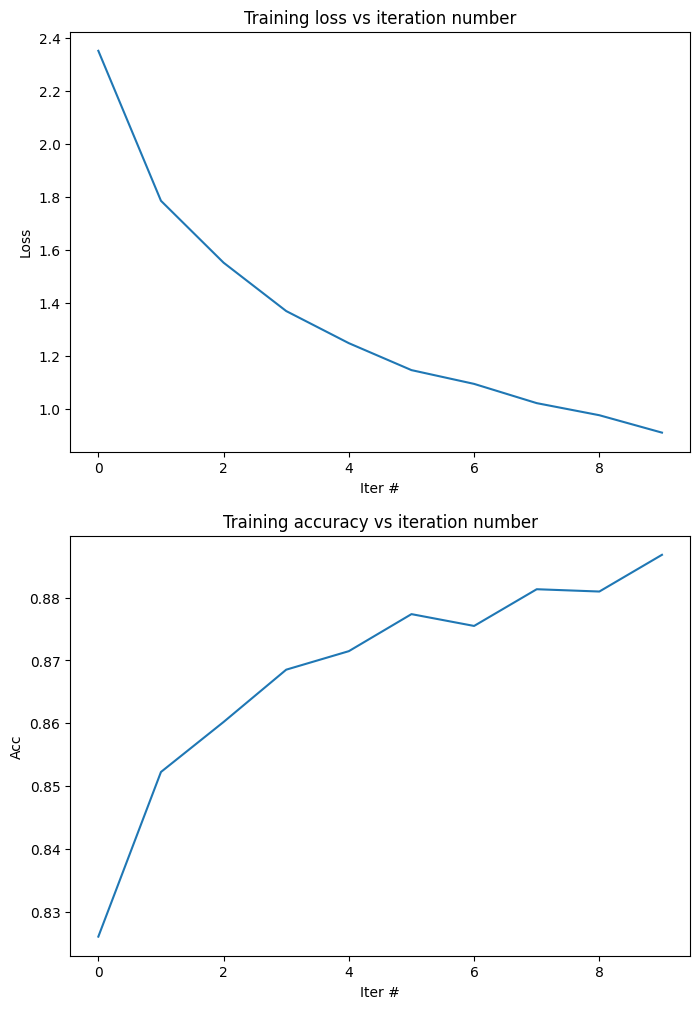

In [ ]:
# STOCHASTIC GRADIENT DESCENT HYPER-PARAMETERS
num_epochs = 10
batch_size = 256
lr = 0.2

W = None
########################################
## TODO: initialize model weight      ##
########################################

W = torch.randn(train_features.shape[1], 10, requires_grad=True, device='cuda') # D x C

########################################
############ End of your code ##########
########################################
W_star = train_stochastic_gradient_descent(num_epochs, batch_size, lr, W, train_features, train_labels)

In [ ]:
test_acc = None
# TODO: report results on validation / test dataset

scores = test_features @ W_star
predictions = scores.argmax(dim=1)
test_acc = (predictions == test_labels).sum() / test_labels.shape[0]

# End of your code
print("SGD Test acc: ", test_acc.item())

SGD Test acc:  0.8859999775886536


In the above problem, you manually update the parameters after calcuting the gradients. In fact, Pytorch implements various optimization algorithms such as SGD in [torch.optim](https://pytorch.org/docs/stable/optim.html), which you can use to conveniently update your parameters. To do that, you simply need to create an optimizer (e.g., `torch.optim.SGD`) by specifying the parameters that need to be updated and associated optimization hyperparameters such as learning rate. In the training loop, you will need to modify your code to include the following two steps:
- Use `optimizer.zero_grad()` to clear gradients of parameters.
- Use `optimizer.step()` to automatically update parameters.

You can refer to [this tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html) for more details and examples.

**Problem 2:** Complete the function `train_sgd_optimizer()` that re-train your classification model but use `torch.optim` to update parameters.

In [ ]:
def train_sgd_optimizer(num_epochs, batch_size, lr, W, train_features, train_targets):
    '''
    This function trains the model w using stochastic gradient desent on the dataset (train_features, train_targets).
    Returns:
    w_star: the optimized model parameter w.
    '''

    losses = []
    accs = []

    ## TODO: define loss function and optimizer
    loss_func = nn.CrossEntropyLoss()
    params = [W]
    optimizer = torch.optim.SGD(params=params, lr=lr)
    ## End of your code

    # Train loop
    for i in range(num_epochs):
        ## TODO: shuffle training data
        train_features, train_targets = random_shuffle(train_features, train_targets)
        ## End of your code

        epoch_step = math.ceil(train_features.shape[0] / batch_size)
        for j in range(epoch_step):
            ## TODO: get features and labels for the batch
            batch_x = train_features[j * batch_size : (j + 1) * batch_size]
            batch_y = train_targets[j * batch_size : (j + 1) * batch_size]
            ## TODO: calculate loss and gradient
            scores = batch_x @ W
            loss = loss_func(scores, batch_y)
            loss.backward()
            ## TODO: update parameters
            ## Note: remember to clear .grad before every iteration
            optimizer.step()
            optimizer.zero_grad()
            ## End of your code

        loss, acc = None, None
        ## TODO: calculate loss, predictions, and accuracy
        scores = train_features @ W
        loss = loss_func(scores, train_targets)
        predictions = scores.argmax(dim=1)
        acc = (predictions == train_targets).sum() / train_features.shape[0]
        ## End of your code

        losses.append(loss.item())
        accs.append(acc.item())

    W_star = W

    print("Training done")
    visualize_loss_acc(losses, accs)
    return W_star

Training done


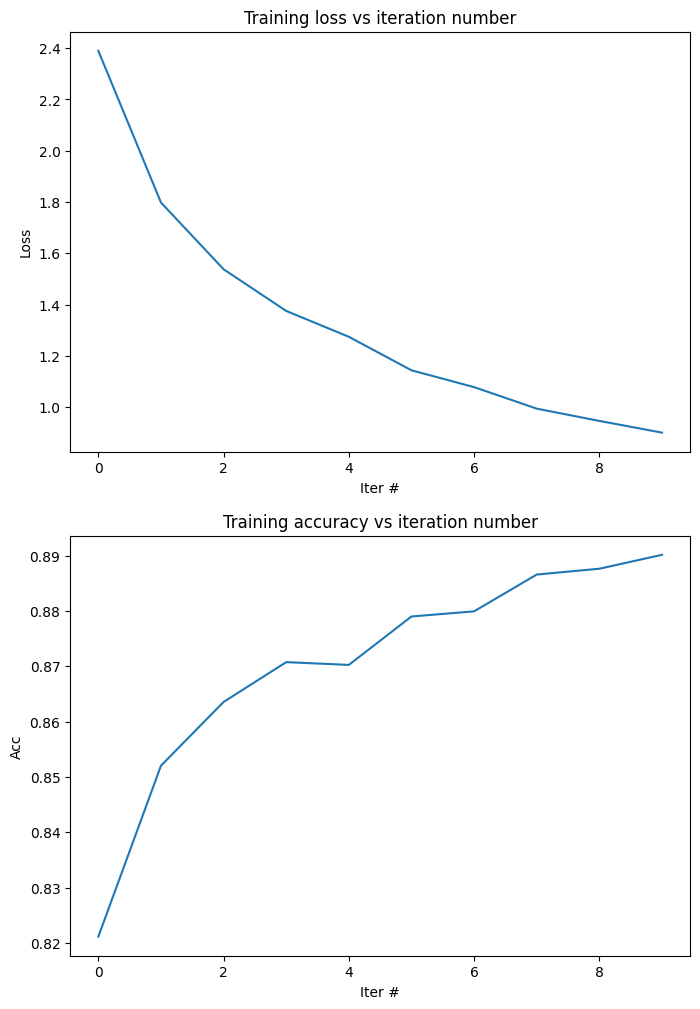

In [ ]:
# STOCHASTIC GRADIENT DESCENT HYPER-PARAMETERS
num_epochs = 10
batch_size = 256
lr = 0.2

########################################
## TODO: initialize model weight      ##
########################################

W = torch.randn(train_features.shape[1], 10, requires_grad=True, device='cuda') # D x C

###########################################
############ End of your code #############
###########################################
W_star = train_sgd_optimizer(num_epochs, batch_size, lr, W, train_features, train_labels)

In [ ]:
test_acc = None
# TODO: report results on validation / test dataset

scores = test_features @ W_star
predictions = scores.argmax(dim=1)
test_acc = (predictions == test_labels).sum() / test_labels.shape[0]

# End of your code
print("SGD Test acc: ", test_acc.item())

SGD Test acc:  0.887999951839447


In previous problems, we manually track all parameters of our model. This is fine for small networks with a few tensors, but it would be extremely inconvenient and error-prone to track tens or hundreds of tensors in larger networks.

PyTorch provides the `nn.Module` API for you to define arbitrary network architectures, while tracking every learnable parameters for you.

To use the Module API, follow the steps below:

1. Subclass `nn.Module`. Give your network class an intuitive name like `TwoLayerMLP`.

2. In the constructor `__init__()`, define all the layers you need as class attributes. Layer objects like `nn.Linear` are themselves `nn.Module` subclasses, so that you don't have to instantiate the raw tensors yourself. `nn.Module` will track these internal parameters for you. Refer to the [doc](http://pytorch.org/docs/master/nn.html) to learn more about the dozens of builtin layers. **Warning**: don't forget to call the `super().__init__()` first!

3. In the `forward()` method, define how data will pass through your network. You should use the attributes defined in `__init__` as function calls that take tensor as input and output the "transformed" tensor. Do *not* create any new layers with learnable parameters in `forward()`! All of them must be declared upfront in `__init__`.

[Here is a detailed example](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html) of how to build a neural network using `nn.Module`.

**Problem 3:** Now you need to extend the previous single-layer model to a two-layer fully-connected neural network (only one hidden layer). Complete the implementation for class `TwoLayerMLP` and function `train_mlp` to build and train your model.

In [ ]:
import torch.nn.functional as F

class TwoLayerMLP(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int):
        '''
        Create a two-layer fully-connect network
        Inputs:
        input_dim: dimension of input features
        hidden_dim: dimension of hidden layer
        output_dim: dimension of output
        '''
        super().__init__()
        ## TODO: define layers in the model
        ## Model architecture: input --> hidden layer --> output
        self.flatten = nn.Flatten()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
        ## End of your code

    def forward(self, x):
        logits = None
        ## TODO: forward pass
        x = self.flatten(x)
        logits = self.network(x)
        ## End of your code
        return logits

In [ ]:
def train_mlp(num_epochs, batch_size, lr, model, train_features, train_targets):
    '''
    This function trains the model w using stochastic gradient desent on the dataset (train_features, train_targets).
    Returns:
    model: the optimized model.
    '''

    losses = []
    accs = []

    ## TODO: define loss function and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
    ## End of your code

    # Train loop
    for i in range(num_epochs):
        ## TODO: shuffle training data
        train_features, train_targets = random_shuffle(train_features, train_targets)
        ## End of your code

        epoch_step = math.ceil(train_features.shape[0] / batch_size)
        for j in range(epoch_step):
            ## TODO: get features and labels for the batch
            batch_x = train_features[j * batch_size : (j + 1) * batch_size]
            batch_y = train_targets[j * batch_size : (j + 1) * batch_size]
            ## TODO: calculate loss and gradient
            scores = model(batch_x)
            loss = loss_func(scores, batch_y)
            loss.backward()
            ## TODO: update parameters
            ## Note: remember to clear .grad before every iteration
            optimizer.step()
            optimizer.zero_grad()
            ## End of your code

        loss, acc = None, None
        ## TODO: calculate loss, predictions, and accuracy
        scores = model(train_features)
        loss = loss_func(scores, train_targets)
        predictions = scores.argmax(dim=1)
        acc = (predictions == train_targets).sum() / train_features.shape[0]
        ## End of your code

        losses.append(loss.item())
        accs.append(acc.item())

    print("Training done")
    visualize_loss_acc(losses, accs)
    return model

Training done


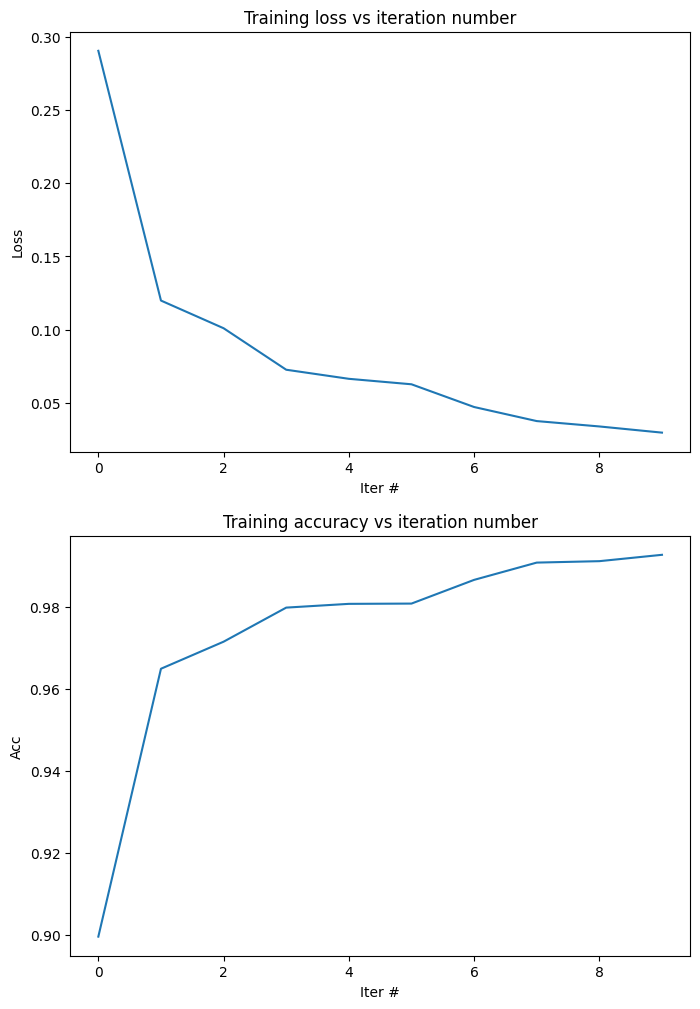

In [ ]:
# STOCHASTIC GRADIENT DESCENT HYPER-PARAMETERS
num_epochs = 10
batch_size = 256
lr = 0.2
hidden_dim = 128 # use this as hidden layer dimension

model = None
#################################
## TODO: initialize model      ##
#################################

input_dim = train_features.shape[1]
output_dim = 10
model = TwoLayerMLP(input_dim, hidden_dim, output_dim).to("cuda")

##################################
######### End of your code #######
##################################
model = train_mlp(num_epochs, batch_size, lr, model, train_features, train_labels)

In [ ]:
test_acc = None
# TODO: report results on validation / test dataset

scores = model(test_features)
predictions = scores.argmax(dim=1)
test_acc = (predictions == test_labels).sum() / test_labels.shape[0]

# End of your code
print("SGD Test acc: ", test_acc.item())

SGD Test acc:  0.9794999957084656


**Problem 4: Text Classification with Pytorch**

In this problem, you will create a text-classification model thtat classifys whether a given movie review is positive or negative. We experiment with the dataset called [SST-2](https://nlp.stanford.edu/sentiment/).


**Download SST-2 dataset**

We provide you with the utility function that downloads and extracts document strings from raw SST-2 dataset.

In [ ]:
import requests
import zipfile
import csv

def download_and_extract(url, local_filename, extract_dir):
    try:
        # Download the file
        response = requests.get(url)
        if response.status_code != 200:
            raise Exception(f"Failed to download {url}. Status code: {response.status_code}")
        # Save to local file
        with open(local_filename, 'wb') as file:
            file.write(response.content)
        # Extract the file
        with zipfile.ZipFile(local_filename, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Extracted {local_filename} to {extract_dir} successfully.")
    except Exception as e:
        print(f"Error: {e}")

def read_sst2(path, maxidx=None):
    data = {'documents' : [], 'labels' : []}
    with open(path, newline="", encoding="utf-8") as csvfile:
        reader = csv.DictReader(csvfile, delimiter="\t")
        for i, row in enumerate(reader):
            text = row["sentence"]
            label = int(row["label"])  # Convert the label to an integer (0 or 1)
            data['documents'].append(text)
            data['labels'].append(label)

            if i == maxidx:
                break
    print("Loaded ", len(data['documents']), " sample from ", path)
    return data

SST2_URL = "https://dl.fbaipublicfiles.com/glue/data/SST-2.zip"
download_and_extract(SST2_URL, 'sst2.zip', '.')
sst2_train = read_sst2("SST-2/train.tsv", )
sst2_dev = read_sst2("SST-2/dev.tsv", )
print("Example documents: \n", sst2_train['documents'][:3])

Extracted sst2.zip to . successfully.
Loaded  67349  sample from  SST-2/train.tsv
Loaded  872  sample from  SST-2/dev.tsv
Example documents: 
 ['hide new secretions from the parental units ', 'contains no wit , only labored gags ', 'that loves its characters and communicates something rather beautiful about human nature ']


Similar to the classification on MNIST where we convert raw images into raw image features. We first need to convert the raw movie review string into a common text feature: [**bag-of-words**](https://www.wikiwand.com/en/Bag-of-words_model).


**Problem 4-1: Tokenize**

In natural language processing, we always first split the full text into small pieces, i.e., tokens. This process is called **tokenize**, which helps us construct a sequence of integers to represent the text.

Below, you need to implement one basic tokenize function on the *documents*, that splits document string into a list of words and convert each word into corresponding integer index that represents the word.

More specifically, you need to implement following functions:

**normalize(document)**: a function that lowercases all characters in the document and adds whitespace before and after ".,!?:;" characters.

**build_vocab(documents)**: a function that stores all unique words in the documents string and corresponding index variable. Remember to add a special **\<unk\>** token into vocaboluary.

**tokenize(vocab2id, document)**: a function that first split document into a sequence of words and then convert words into a list of corresponding integer index. For those unkown words, use the index of **\<unk\>** token to represent.

**bag_of_words(vocab2id, documents)**: a function that constructs **bag-of-words** feature of documents. Bag of words is represented as a unordered collection of words.

In [ ]:
documents = [
    "This is, the first document.",
    "This document , is the second document.",
    "And this is the third one.",
    "Is this the first document?",
    "How many documents are here"
]

In [ ]:
import numpy as np
from collections import Counter

def normalize(document):
    ## TODO:
    ## 1. Lowercase all characters in the document.
    ## 2. Add white space before and after following punctuation marks .,!?;:
    res = document.lower()
    for punc in ".,!?;:":
        res = res.replace(punc, " " + punc + " ")
    ## END OF YOUR CODE
    return res

def build_vocab(documents):
    # Build vocabulary
    vocabulary = set()

    for document in documents:
        ## TODO: normalize document, split the document string into pieces of words and find the unique words
        token_list = normalize(document).split()
        for token in token_list:
            vocabulary.add(token)
        ## END OF YOUR CODE

    vocabulary = sorted(list(vocabulary))
    assert "<unk>" not in vocabulary

    ## TODO: insert the <unk> token into the vocabulary
    vocabulary.append("<unk>")
    ## END OF YOUR CODE

    word2id = {}
    ## TODO: construct a mapping from word string into an integer index
    for index, word in enumerate(vocabulary):
        word2id[word] = index
    ## END OF YOUR CODE

    print("Number of unique words: ", len(vocabulary))
    print("The words are", vocabulary)
    print("Word to id dict is: ", word2id)
    return vocabulary, word2id

def tokenize(word2id, document):
    wordids = []
    ## TODO: Tokenize the document string into a list of integers called wordids
    token_list = normalize(document).split()
    for token in token_list:
        if token in word2id:
            wordids.append(word2id[token])
        else:
            wordids.append(word2id["<unk>"])
    ## END OF YOUR WORDS
    return wordids

def bag_of_words_doc(word2id, document):
    features = np.zeros(len(word2id)).astype(np.float32)
    ## TODO: Construct bag of word feature for a document
    token_ids = tokenize(word2id, document)
    for id in token_ids:
        features[id] += 1
    ## END OF YOUR CODE
    return features

vocab, word2id = build_vocab(documents)
document = documents[0]
print("Input document: ", document)
print("Tokenize result: ", tokenize(word2id, document))
print("Document bag of words feature: ", bag_of_words_doc(word2id, document))

Number of unique words:  18
The words are [',', '.', '?', 'and', 'are', 'document', 'documents', 'first', 'here', 'how', 'is', 'many', 'one', 'second', 'the', 'third', 'this', '<unk>']
Word to id dict is:  {',': 0, '.': 1, '?': 2, 'and': 3, 'are': 4, 'document': 5, 'documents': 6, 'first': 7, 'here': 8, 'how': 9, 'is': 10, 'many': 11, 'one': 12, 'second': 13, 'the': 14, 'third': 15, 'this': 16, '<unk>': 17}
Input document:  This is, the first document.
Tokenize result:  [16, 10, 0, 14, 7, 5, 1]
Document bag of words feature:  [1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]


**Problem 4-2: Train MLP on SST2**

Storing the full sst2 dataset in memory is infeasible due to memory limit, therefore, we need to dynamically convert a batch of raw document string into a batch of features in the original `train_mlp()` function.

In this part, you need to modify the `train_mlp()` function a little. Then train a two layer MLP on SST-2 dataset, visualize the training losses and validation loss, report the accuracy on validation set.

In [ ]:
import tqdm

def eval_on_dataset(batch_size, dataset):
    documents = dataset["documents"]
    labels = dataset["labels"]

    loss_func = nn.CrossEntropyLoss()
    epoch_step = math.ceil(len(dataset["documents"]) / batch_size)
    preds = []
    losses = []
    for i in range(epoch_step):
        batch_y = torch.LongTensor(labels[i * batch_size : (i + 1) * batch_size]).to("cuda")
        batch_xs = documents[i * batch_size : (i + 1) * batch_size]
        x_features = [bag_of_words_doc(word2id, x) for x in batch_xs]
        x_features = np.stack(x_features)
        input_x = torch.from_numpy(x_features).to("cuda")

        scores = model(input_x)
        pred = torch.argmax(scores, dim=-1)
        loss = loss_func(scores, batch_y)
        preds.append(pred)
        losses.append(loss.item())

    # get remaining that doesn't fit in batch
    if epoch_step * batch_size < len(dataset["documents"]):
        batch_y = torch.LongTensor(labels[epoch_step * batch_size : ]).to("cuda")
        batch_xs = documents[epoch_step * batch_size : ]
        x_features = [bag_of_words_doc(word2id, x) for x in batch_xs]
        x_features = np.stack(x_features)
        input_x = torch.from_numpy(x_features).to("cuda")

        scores = model(input_x)
        pred = torch.argmax(scores, dim=-1)
        loss = loss_func(scores, batch_y)
        preds.append(pred)
        losses.append(loss.item())

    preds = torch.cat(preds, dim=0)
    losses = torch.FloatTensor(losses)
    loss = torch.mean(losses)
    labels = torch.LongTensor(labels).to("cuda")
    acc = (preds == labels).float().mean()
    return loss, acc


def train_mlp_sst(num_epochs, batch_size, lr, model, sst2_train, sst2_val):
    '''
    This function trains the model w using stochastic gradient desent on the dataset (train_features, train_targets).
    Returns:
    model: the optimized model.
    '''

    losses = []
    accs = []
    val_losses = []
    val_accs = []

    ## TODO: define loss function and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(params=model.parameters(), lr=lr, weight_decay=0.01)
    ## End of your code

    # Train loop
    for i in range(num_epochs):
        ## TODO: shuffle training data
        rand_idxs = np.random.permutation(len(sst2_train["documents"]))
        ## End of your code

        epoch_step = math.ceil(len(sst2_train["documents"]) / batch_size)
        for j in tqdm.tqdm(range(epoch_step)):
            ## TODO: get features and labels for the batch: dynamically convert raw document string into feature tensors
            batch_idx = rand_idxs[j * batch_size : (j + 1) * batch_size]
            batch_ys = torch.LongTensor([sst2_train["labels"][x] for x in batch_idx]).to("cuda")
            batch_xs = [sst2_train["documents"][x] for x in batch_idx]

            x_features = [bag_of_words_doc(word2id, x) for x in batch_xs]
            x_features = np.stack(x_features)
            input_x = torch.from_numpy(x_features).to("cuda")

            # batch_xs = [bag_of_words_doc(word2id, x) for x in batch_xs]
            # batch_xs = np.stack(batch_xs)
            # batch_xs = torch.from_numpy(batch_xs).to("cuda")
            ## TODO: calculate loss and gradient
            scores = model(input_x)
            loss = loss_func(scores, batch_ys)
            ## TODO: update parameters
            ## Note: remember to clear .grad before every iteration
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            ## End of your code

        ## TODO: calculate loss, predictions, and accuracy
        loss_train, acc_train = eval_on_dataset(batch_size, sst2_train)
        loss_valid, acc_valid = eval_on_dataset(batch_size, sst2_dev)

        print("Validation Loss:", loss_valid.item())
        print("Validation Acc:", acc_valid.item())

        ## End of your code
        losses.append(loss_train.item())
        accs.append(acc_train.item())
        val_losses.append(loss_valid.item())
        val_accs.append(acc_valid.item())

    print("All validation losses:", val_losses)

    print("Training done")
    visualize_loss_acc(losses, accs)
    visualize_loss_acc(val_losses, val_accs)
    return model

Number of unique words:  14775
The words are ['!', '#', '$', '&', "'", "''", "'30s", "'40s", "'50s", "'53", "'60s", "'70s", "'80s", "'90s", "'d", "'em", "'ll", "'m", "'n", "'n'", "'re", "'s", "'til", "'ve", '(', ')', '*', '***', '****', '+', ',', '-', '--', '.', '/', '000', '1', '1/2', '10', '10-course', '10-year', '10-year-old', '100', '100-minute', '101', '103-minute', '105', '10th', '10th-grade', '11', '110', '112-minute', '12-year-old', '120', '127', '129-minute', '12th', '13', '13th', '14-year-old', '140', '146', '15', '15-year', '15th', '163', '168-minute', '170', '1790', '18', '18-year-old', '1899', '19', '1920', '1930s', '1933', '1937', '1938', '1940s', '1950', '1950s', '1952', '1957', '1958', '1959', '1960', '1960s', '1962', '1970', '1970s', '1972', '1973', '1975', '1979', '1980', '1980s', '1984', '1986', '1987', '1989', '1993', '1994', '1995', '1997', '1998', '1999', '19th', '19th-century', '2', '2-day', '2/3', '20', '20-car', '2000', '2001', '2002', '20th', '21/2', '21st', '

100%|██████████| 264/264 [00:05<00:00, 45.97it/s]


Validation Loss: 0.6290982961654663
Validation Acc: 0.7224770188331604


100%|██████████| 264/264 [00:04<00:00, 56.15it/s]


Validation Loss: 0.5458325743675232
Validation Acc: 0.7706421613693237


100%|██████████| 264/264 [00:05<00:00, 52.02it/s]


Validation Loss: 0.48582977056503296
Validation Acc: 0.7889907956123352


100%|██████████| 264/264 [00:05<00:00, 44.27it/s]


Validation Loss: 0.4508393704891205
Validation Acc: 0.8027522563934326


100%|██████████| 264/264 [00:04<00:00, 56.50it/s]


Validation Loss: 0.43204283714294434
Validation Acc: 0.811926543712616


100%|██████████| 264/264 [00:04<00:00, 55.78it/s]


Validation Loss: 0.42504316568374634
Validation Acc: 0.814220130443573


100%|██████████| 264/264 [00:06<00:00, 42.86it/s]


Validation Loss: 0.4268033504486084
Validation Acc: 0.8107798099517822


100%|██████████| 264/264 [00:04<00:00, 56.00it/s]


Validation Loss: 0.42952293157577515
Validation Acc: 0.8130733370780945


100%|██████████| 264/264 [00:04<00:00, 54.90it/s]


Validation Loss: 0.43775391578674316
Validation Acc: 0.814220130443573


100%|██████████| 264/264 [00:06<00:00, 43.49it/s]


Validation Loss: 0.443940132856369
Validation Acc: 0.8176605105400085
All validation losses: [0.6290982961654663, 0.5458325743675232, 0.48582977056503296, 0.4508393704891205, 0.43204283714294434, 0.42504316568374634, 0.4268033504486084, 0.42952293157577515, 0.43775391578674316, 0.443940132856369]
Training done


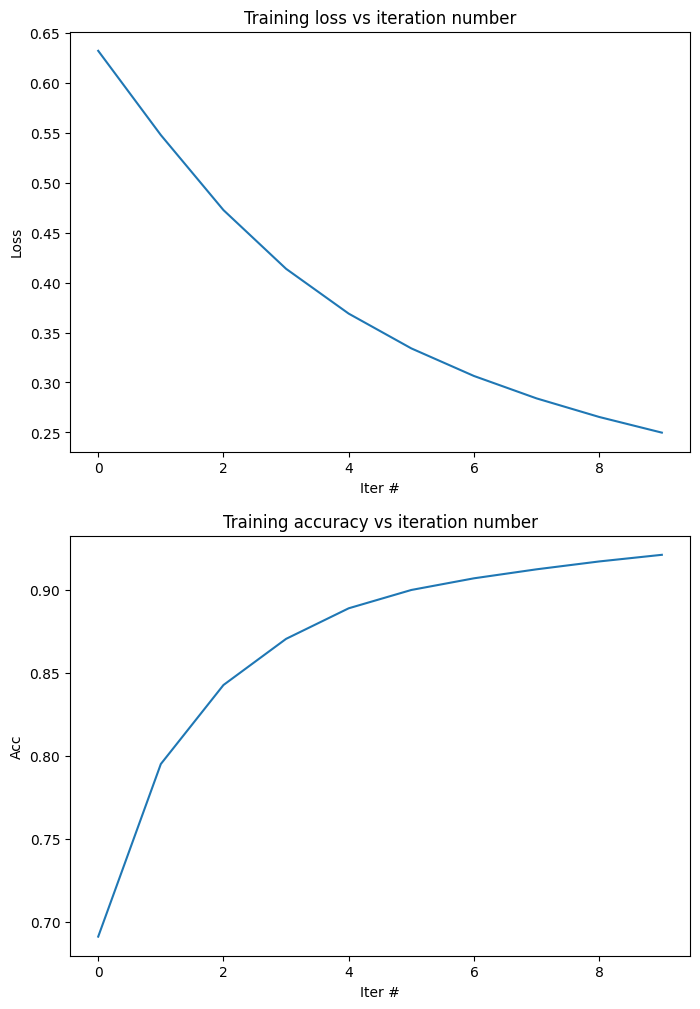

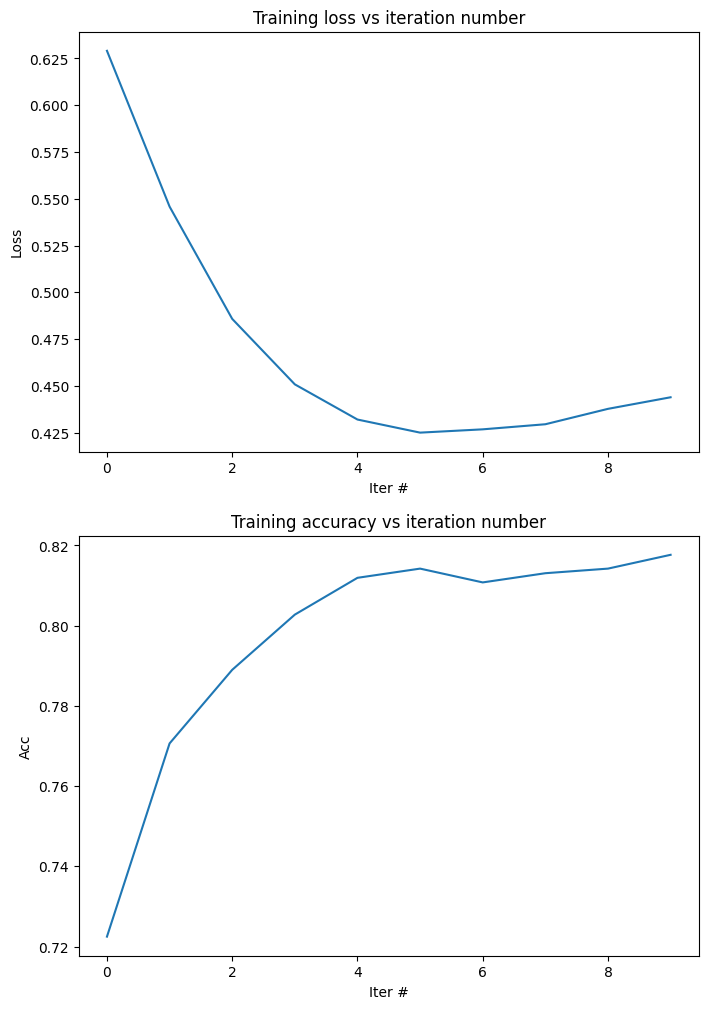

In [ ]:
# STOCHASTIC GRADIENT DESCENT HYPER-PARAMETERS
# use 10, 256, 0.0001, 32
num_epochs = 10
batch_size = 256
lr = 0.0001
hidden_dim = 32  # use this as hidden layer dimension


model = None
#################################
## TODO: initialize model      ##
#################################

vocab, word2id = build_vocab(sst2_train["documents"])
input_dim = len(vocab)
output_dim = 2
model = TwoLayerMLP(input_dim, hidden_dim, output_dim).to("cuda")

##################################
######### End of your code #######
##################################
model = train_mlp_sst(num_epochs, batch_size, lr, model, sst2_train, sst2_dev)

**Problem 4-3: Effect of number of layers**

Experiment with different hyper-parameters: try fully-connected models with 3, 5, 10 layers. You need to implement a new class called `NLayerMLP` that takes the number of layers as hyper-parameter and constructs an MLP with multiple layers (all hidden layers have the same dimension).

Visualize the training loss and validation loss (visualize validation loss at the end of each epoch), discuss your findings.

In [ ]:
class NLayerMLP(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int, num_layers: int):
        '''
        Create a N-layer fully-connect network
        Inputs:
        input_dim: dimension of input features
        hidden_dim: dimension of hidden layer
        output_dim: dimension of output
        num_layers: number of hidden layers
        '''
        super().__init__()
        ## TODO: define layers in the model
        ## Model architecture: input --> hidden layer (x N) --> output

        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        for i in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.network = nn.Sequential(*layers)

        ## End of your code

    def forward(self, x):
        logits = None
        ## TODO: forward pass
        logits = self.network(x)
        ## End of your code
        return logits

Number of unique words:  14775
The words are ['!', '#', '$', '&', "'", "''", "'30s", "'40s", "'50s", "'53", "'60s", "'70s", "'80s", "'90s", "'d", "'em", "'ll", "'m", "'n", "'n'", "'re", "'s", "'til", "'ve", '(', ')', '*', '***', '****', '+', ',', '-', '--', '.', '/', '000', '1', '1/2', '10', '10-course', '10-year', '10-year-old', '100', '100-minute', '101', '103-minute', '105', '10th', '10th-grade', '11', '110', '112-minute', '12-year-old', '120', '127', '129-minute', '12th', '13', '13th', '14-year-old', '140', '146', '15', '15-year', '15th', '163', '168-minute', '170', '1790', '18', '18-year-old', '1899', '19', '1920', '1930s', '1933', '1937', '1938', '1940s', '1950', '1950s', '1952', '1957', '1958', '1959', '1960', '1960s', '1962', '1970', '1970s', '1972', '1973', '1975', '1979', '1980', '1980s', '1984', '1986', '1987', '1989', '1993', '1994', '1995', '1997', '1998', '1999', '19th', '19th-century', '2', '2-day', '2/3', '20', '20-car', '2000', '2001', '2002', '20th', '21/2', '21st', '

100%|██████████| 264/264 [00:06<00:00, 39.98it/s]


Validation Loss: 0.697980523109436
Validation Acc: 0.5091742873191833


100%|██████████| 264/264 [00:06<00:00, 39.82it/s]


Validation Loss: 0.6950676441192627
Validation Acc: 0.5091742873191833


100%|██████████| 264/264 [00:05<00:00, 51.97it/s]


Validation Loss: 0.4512684643268585
Validation Acc: 0.8188073039054871


100%|██████████| 264/264 [00:05<00:00, 47.88it/s]


Validation Loss: 0.4931771755218506
Validation Acc: 0.8199540972709656


100%|██████████| 264/264 [00:06<00:00, 41.13it/s]


Validation Loss: 0.5264008045196533
Validation Acc: 0.8279815912246704


100%|██████████| 264/264 [00:05<00:00, 51.29it/s]


Validation Loss: 0.542656421661377
Validation Acc: 0.8268347978591919


100%|██████████| 264/264 [00:05<00:00, 51.65it/s]


Validation Loss: 0.5616329312324524
Validation Acc: 0.8233944773674011


100%|██████████| 264/264 [00:06<00:00, 42.02it/s]


Validation Loss: 0.5644516944885254
Validation Acc: 0.8211008906364441


100%|██████████| 264/264 [00:06<00:00, 41.77it/s]


Validation Loss: 0.5814703106880188
Validation Acc: 0.8233944773674011


100%|██████████| 264/264 [00:05<00:00, 51.85it/s]


Validation Loss: 0.5918362140655518
Validation Acc: 0.8268347978591919
All validation losses: [0.697980523109436, 0.6950676441192627, 0.4512684643268585, 0.4931771755218506, 0.5264008045196533, 0.542656421661377, 0.5616329312324524, 0.5644516944885254, 0.5814703106880188, 0.5918362140655518]
Training done


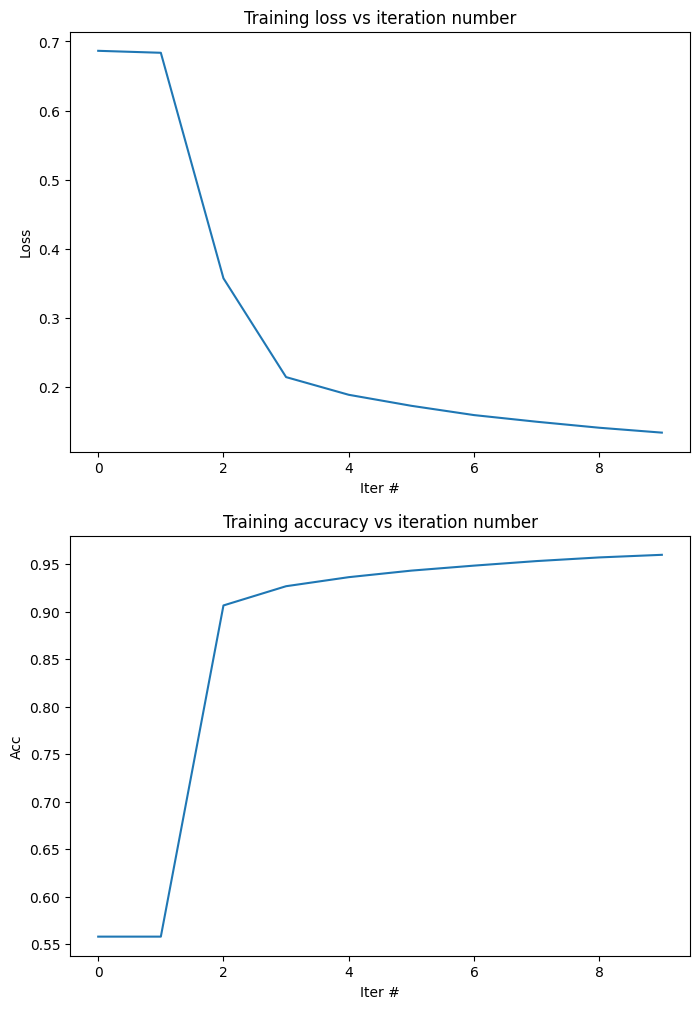

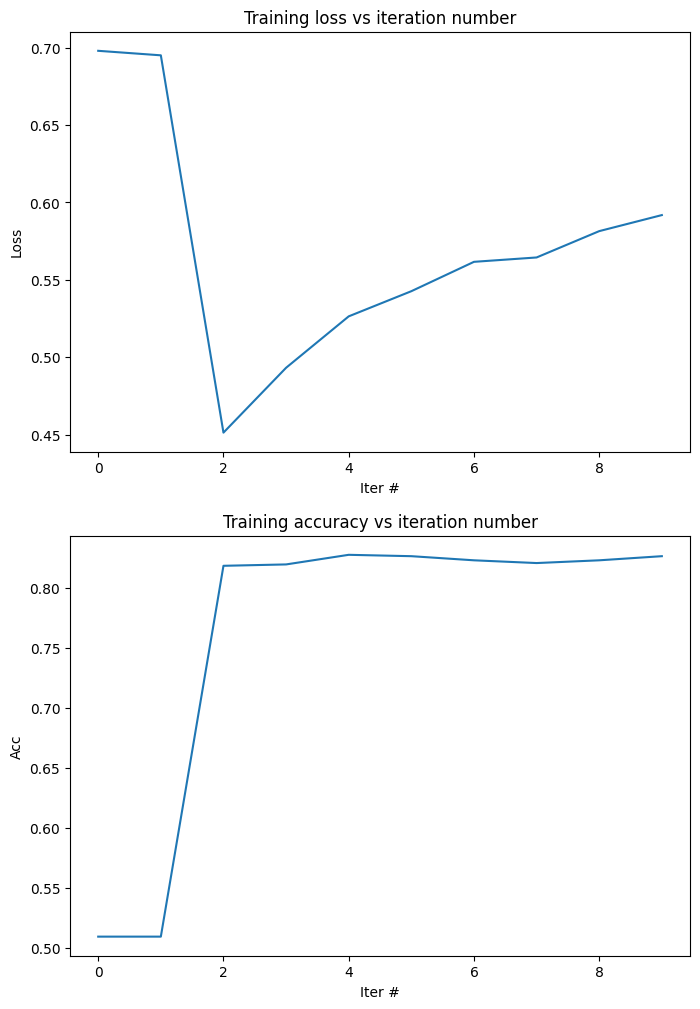

In [ ]:
# STOCHASTIC GRADIENT DESCENT HYPER-PARAMETERS
# use 10, 256, 0.0001, 32
num_epochs = 10
batch_size = 256
lr = 0.0001
hidden_dim = 16  # use this as hidden layer dimension
num_layers = 10

model = None
#################################
## TODO: initialize model      ##
#################################

vocab, word2id = build_vocab(sst2_train["documents"])
input_dim = len(vocab)
output_dim = 2
model = NLayerMLP(input_dim, hidden_dim, output_dim, num_layers).to("cuda")

##################################
######### End of your code #######
##################################
model = train_mlp_sst(num_epochs, batch_size, lr, model, sst2_train, sst2_dev)

Question 4 Report:

I ran a multilayer MLP for 2, 3, 5, and 10 layers. The validation accuracy for 5 layers and 10 layers was actually higher than the validation accuracy for 2 and 3 layers. This indicates that 5 and 10 layers may be overfitting, while 2 and 3 layers are a good fit for the complexity of the bag of word embeddings. Also, reducing the learning rate and hidden dimension size helped increase the validation accuracy for MLPs with higher amount of layers, which also supports the idea that we have too many parameters and are overfitting.